**1 RAW DATA PREPROCESSING**

In [ ]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 53.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=cdebcbf0406f8edc17e51b85e3bf83cec19f8a6cee26817f93c3d99a0fa71dc1
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:


from google.colab import drive
drive.mount('/content/drive')

# Step 2: Import necessary libraries
import pandas as pd
from ydata_profiling import ProfileReport

# Step 3: Specify the file path
# If the file is stored in Google Drive, specify the full path within your Drive
file_path = '/content/drive/MyDrive/neostat_data/sales_data.csv'  # Replace with your actual folder name and file name

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Step 4: Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Check for duplicate rows
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Step 5: Statistical summary
print("Statistical summary of the data:")
print(df.describe())

# Check data types of columns
print("Data types of columns:")
print(df.dtypes)

# Step 6: Generate a Pandas Profiling Report
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)

# Save the report to an HTML file
profile.to_file("/content/data_profile_report.html")
print("Pandas Profiling report generated successfully!")

# Step 7: Instructions to download the report
from google.colab import files
files.download('/content/data_profile_report.html')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Missing values in each column:
OrderID             0
CustomerName        0
PhoneNumber         0
Location            0
Country             0
StoreCode           0
Product             0
Quantity            0
Price               9
Date                0
CreditCardNumber    0
ExpiryDate          0
dtype: int64
Number of duplicate rows: 0
Statistical summary of the data:
         Quantity         Price
count   99.000000  9.000000e+01
mean    42.868687  8.813004e+04
std     52.973356  8.209713e+05
min      1.000000  1.659600e+02
25%      6.000000  5.212900e+02
50%      9.000000  9.728750e+02
75%     71.500000  2.805749e+03
max    162.000000  7.790000e+06
Data types of columns:
OrderID              object
CustomerName         object
PhoneNumber          object
Location             object
Country              object
StoreCode            object
Product              ob

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Pandas Profiling report generated successfully!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
pip install azure-storage-blob


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.6/408.6 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 16.7 MB/s eta 0:00:00


**2 DATA(raw) INGESTION TO AZURE**

In [ ]:

from azure.storage.blob import BlobServiceClient
import os

# Connection string for the ADLS Gen2 account
connection_string = 'DefaultEndpointsProtocol=https;AccountName=salesdata2;AccountKey=qmGm5qRmT45FAUNreFet0Tb+GQ7Hn8tFVGM6STDpN2h+IqG/0HTPqpiSzf7io6InKhKZ/KgJxk86+AStA1wfHA==;EndpointSuffix=core.windows.net' #my connection string

# Initialize BlobServiceClient
blob_service_client = BlobServiceClient.from_connection_string(connection_string)

# Specify container and file details
container_name = 'salesdata11'
local_file_path = '/content/drive/MyDrive/neostat_data/sales_data.csv'
blob_name = 'sales_data.csv'

# Upload file to ADLS Gen2
def upload_to_adls():
    try:
        # Get the BlobClient
        blob_client = blob_service_client.get_blob_client(container=container_name, blob=blob_name)

        # Upload the file
        with open(local_file_path, 'rb') as data:
            blob_client.upload_blob(data, overwrite=True)

        print(f"File '{blob_name}' uploaded successfully to container '{container_name}'.")
    except Exception as e:
        print(f"Error uploading file: {e}")

# Call the function
upload_to_adls()


File 'sales_data.csv' uploaded successfully to container 'salesdata11'.


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**3 Automated Data Cleaning and Uploading to ADLS and Google Drive**

In [ ]:
!pip install azure-storage-file-datalake

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.4/258.4 kB 3.7 MB/s eta 0:00:00


In [11]:
from azure.storage.filedatalake import DataLakeServiceClient
import pandas as pd
from io import BytesIO

# Connection string for the ADLS Gen2 account
connection_string = 'DefaultEndpointsProtocol=https;AccountName=salesdata2;AccountKey=qmGm5qRmT45FAUNreFet0Tb+GQ7Hn8tFVGM6STDpN2h+IqG/0HTPqpiSzf7io6InKhKZ/KgJxk86+AStA1wfHA==;EndpointSuffix=core.windows.net'  # Replace with your connection string

# File and container details
container_name = 'salesdata11'
file_path = 'sales_data.csv'  # Input file
cleaned_file_path = 'cleaneddataset.csv'  # Cleaned output file
google_drive_path = '/content/drive/My Drive/neostat_data/cleaneddataset.csv'

# Initialize DataLakeServiceClient
datalake_service_client = DataLakeServiceClient.from_connection_string(connection_string)

def fetch_data():
    try:
        # Get file system client
        file_system_client = datalake_service_client.get_file_system_client(container_name)

        # Fetch the file from ADLS
        file_client = file_system_client.get_file_client(file_path)
        download = file_client.download_file()
        downloaded_bytes = download.readall()

        # Load the file into a pandas DataFrame
        df = pd.read_csv(BytesIO(downloaded_bytes))
        print("Data fetched successfully.")
        return df
    except Exception as e:
        print(f"Error fetching data: {e}")
        return None

# Data quality checks
def check_missing_values(data):
    missing_values = data.isnull().sum()
    print("\nMissing Values:")
    print(missing_values)
    return missing_values

def check_duplicates(data):
    duplicates = data.duplicated().sum()
    print("\nNumber of Duplicate Rows: ", duplicates)
    return duplicates

def check_data_types(data):
    print("\nData Types:")
    print(data.dtypes)

def check_outliers(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
    print(f"\nOutliers in {column_name}:")
    print(outliers)
    return outliers

def check_invalid_data(data):
    # Example: Check if phone number format is valid (basic validation)
    if 'PhoneNumber' in data.columns:
        invalid_phones = data[~data['PhoneNumber'].str.match(r'^\+1 \d{3}-\d{3}-\d{4}$', na=False)]
        print("\nInvalid Phone Numbers:")
        print(invalid_phones[['PhoneNumber']])

    # Example: Check if 'Date' column has any invalid dates
    if 'Date' in data.columns:
        invalid_dates = data[pd.to_datetime(data['Date'], errors='coerce').isnull()]
        print("\nInvalid Dates:")
        print(invalid_dates[['Date']])

def check_data_quality(data):
    # Check missing values
    missing_values = check_missing_values(data)
    if missing_values.any():
        print("\nMissing values detected! You may want to fill or drop them.")

    # Check for duplicates
    duplicates = check_duplicates(data)
    if duplicates > 0:
        print("\nDuplicates detected! You may want to remove them.")

    # Check data types
    check_data_types(data)

    # Check for outliers in 'Price' and 'Quantity' (example columns)
    if 'Price' in data.columns:
        check_outliers(data, 'Price')
    if 'Quantity' in data.columns:
        check_outliers(data, 'Quantity')

    # Check for invalid phone numbers and dates
    check_invalid_data(data)

    print("\nData check completed.")

def clean_data(data):
    print("Performing data cleaning...")

    # Check and print missing values before cleaning
    print("\nMissing values before cleaning:")
    print(data.isnull().sum())

    # Iterate through all columns to handle missing values
    for column in data.columns:
        if data[column].dtype == 'object':  # For categorical (object) data
            data[column].fillna("Unknown", inplace=True)
        elif pd.api.types.is_numeric_dtype(data[column]):  # For numeric data
            data[column].fillna(data[column].mean(), inplace=True)  # Fill with mean
        elif pd.api.types.is_datetime64_any_dtype(data[column]):  # For datetime data
            data[column].fillna(pd.Timestamp('2000-01-01'), inplace=True)  # Fill with default date

    # Check and print missing values after cleaning
    print("\nMissing values after cleaning:")
    print(data.isnull().sum())

    # Ensure 'Quantity' and 'Price' are numeric (if these columns exist)
    if 'Quantity' in data.columns:
        data['Quantity'] = pd.to_numeric(data['Quantity'], errors='coerce')
    if 'Price' in data.columns:
        data['Price'] = pd.to_numeric(data['Price'], errors='coerce')

    # Ensure 'Date' is in datetime format (if 'Date' exists)
    if 'Date' in data.columns:
        data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

    print("Data cleaning completed.")
    return data

def upload_cleaned_data(df):
    try:
        # Convert cleaned DataFrame to bytes
        output_buffer = BytesIO()
        df.to_csv(output_buffer, index=False)
        output_buffer.seek(0)

        # Get the file client for cleaned file
        file_client = datalake_service_client.get_file_system_client(container_name).get_file_client(cleaned_file_path)

        # Upload the cleaned file to ADLS
        file_client.upload_data(output_buffer, overwrite=True)
        print(f"Cleaned dataset '{cleaned_file_path}' uploaded successfully.")
    except Exception as e:
        print(f"Error uploading cleaned dataset: {e}")
def save_cleaned_data_to_google_drive(df):
    try:
        # Save cleaned DataFrame to Google Drive
        df.to_csv(google_drive_path, index=False)
        print(f"Cleaned dataset saved successfully to Google Drive at '{google_drive_path}'.")
    except Exception as e:
        print(f"Error saving cleaned dataset to Google Drive: {e}")


# Main workflow
if __name__ == "__main__":
    # Fetch data
    raw_data = fetch_data()
    if raw_data is not None:
        # Perform data quality checks
        check_data_quality(raw_data)

        # Clean data
        cleaned_data = clean_data(raw_data)

        # Upload cleaned data back to ADLS
        upload_cleaned_data(cleaned_data)
        # Save cleaned data to Google Drive
        save_cleaned_data_to_google_drive(cleaned_data)


Data fetched successfully.

Missing Values:
OrderID             0
CustomerName        0
PhoneNumber         0
Location            0
Country             0
StoreCode           0
Product             0
Quantity            0
Price               9
Date                0
CreditCardNumber    0
ExpiryDate          0
dtype: int64

Missing values detected! You may want to fill or drop them.

Number of Duplicate Rows:  0

Data Types:
OrderID              object
CustomerName         object
PhoneNumber          object
Location             object
Country              object
StoreCode            object
Product              object
Quantity              int64
Price               float64
Date                 object
CreditCardNumber     object
ExpiryDate           object
dtype: object

Outliers in Price:
   OrderID   CustomerName      PhoneNumber Location Country StoreCode Product  \
38   DRTYF  Test User1001  +1 657-683-1988   Mumbai   India     IN444   Phone   

    Quantity      Price        Date     Cr

<ipython-input-11-5fa4d614faf3>:71: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  invalid_dates = data[pd.to_datetime(data['Date'], errors='coerce').isnull()]
<ipython-input-11-5fa4d614faf3>:110: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna("Unknown", inplace=True)
<ipython-input-11-5fa4d614faf3>:112: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chain

Cleaned dataset 'cleaneddataset.csv' uploaded successfully.
Cleaned dataset saved successfully to Google Drive at '/content/drive/My Drive/neostat_data/cleaneddataset.csv'.


**Data Fetched Successfully**
The data from Azure Data Lake Storage (ADLS) was successfully retrieved and loaded into the program.

**Missing Values**

The Price column has 9 missing values, indicating some rows do not have a price listed.
All other columns do not have any missing values.

**Duplicates**
There are no duplicate rows in the data, meaning there are no repeated records.

**Data Types**
The columns have the correct data types. For example, the Price column is of type float, and the Quantity column is of type integer.
However, the Date column is currently in text format and will need to be converted to a date format.

**Outliers**
The Price column contains one extreme value (7790000), which is considered an outlier.
The Quantity column does not contain any outliers.


**Invalid Data**
There are no invalid phone numbers, and the phone numbers appear to follow the correct format.
There are no invalid dates in the Date column, but a warning indicates that the date format may need adjustment for future versions of pandas.


**Data Cleaning**
Missing values in the Price column were filled with the average price of the column.
Missing categorical data was filled with the word "Unknown".
Missing date values were replaced with a default date (2000-01-01).
After cleaning, all columns now have no missing values.

**Data Upload**

The cleaned data was successfully uploaded to both Azure Data Lake Storage (ADLS) and saved to Google Drive.

**4 Data visualization and analysis:**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Cleaned data loaded successfully.


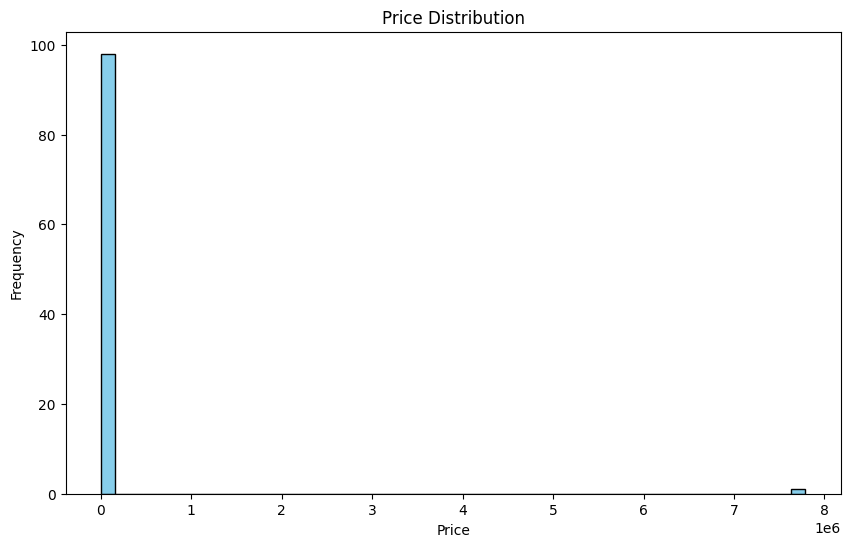

<ipython-input-14-116e26eb4543>:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Product', y='Quantity', data=data, palette='viridis', ci=None)
<ipython-input-14-116e26eb4543>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product', y='Quantity', data=data, palette='viridis', ci=None)


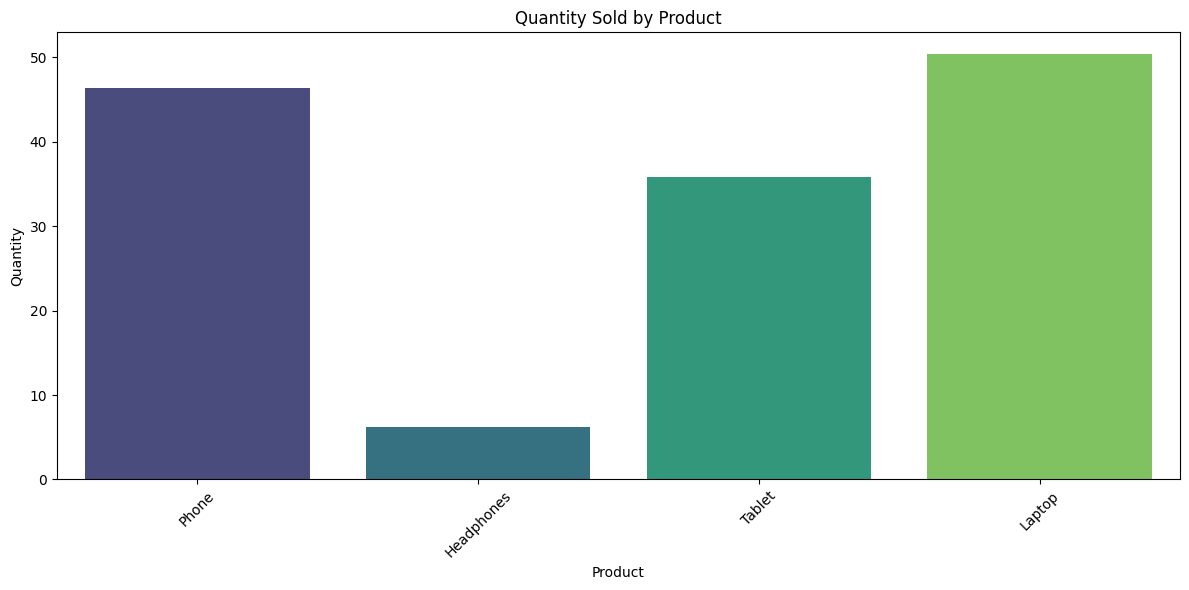

<ipython-input-14-116e26eb4543>:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Location', y='Price', data=location_sales, palette='Blues', ci=None)
<ipython-input-14-116e26eb4543>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Location', y='Price', data=location_sales, palette='Blues', ci=None)


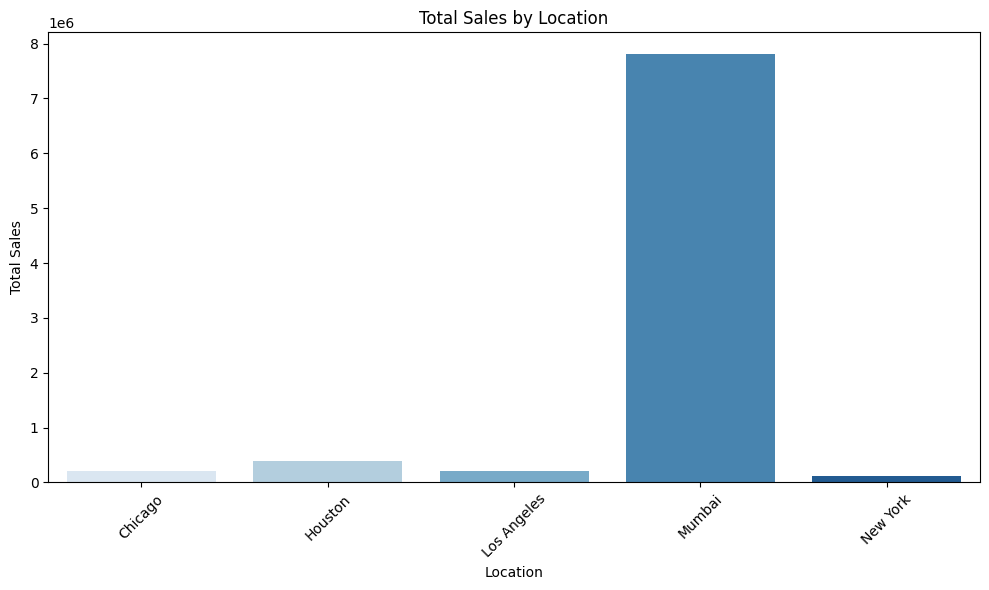

Basic Statistics:
          Quantity         Price
count   99.000000  9.900000e+01
mean    42.868687  8.813004e+04
std     52.973356  7.823660e+05
min      1.000000  1.659600e+02
25%      6.000000  5.699500e+02
50%      9.000000  1.183510e+03
75%     71.500000  3.248177e+03
max    162.000000  7.790000e+06

Missing Values:
 OrderID             0
CustomerName        0
PhoneNumber         0
Location            0
Country             0
StoreCode           0
Product             0
Quantity            0
Price               0
Date                0
CreditCardNumber    0
ExpiryDate          0
dtype: int64


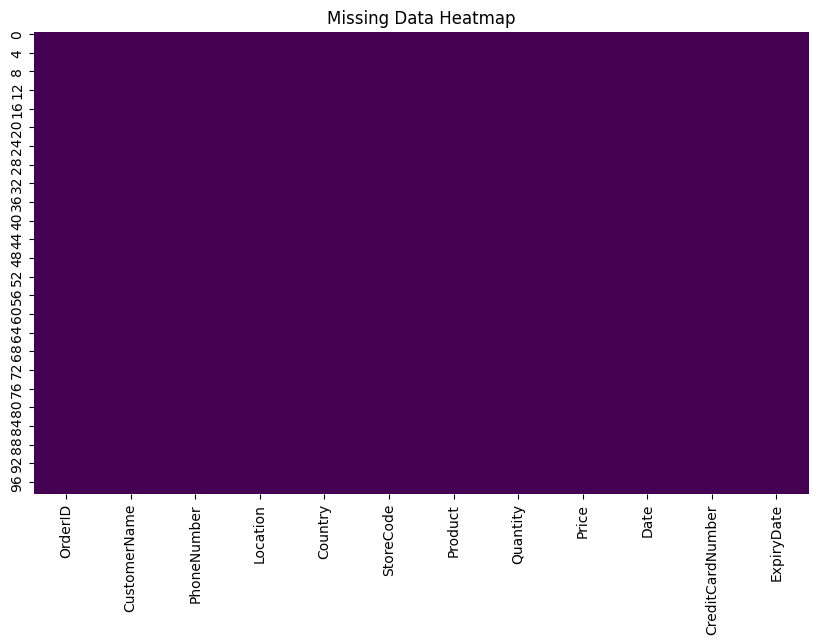

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Path to the cleaned dataset in Google Drive
cleaned_data_path = '/content/drive/My Drive/neostat_data/cleaneddataset.csv'

# Step 1: Load the cleaned data
try:
    data = pd.read_csv(cleaned_data_path)
    print("Cleaned data loaded successfully.")
except Exception as e:
    print(f"Error loading cleaned data: {e}")

# Step 2: Histogram for Price Distribution
plt.figure(figsize=(10, 6))
plt.hist(data['Price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Step 3: Bar Plot for Quantity Sold by Product
plt.figure(figsize=(12, 6))
sns.barplot(x='Product', y='Quantity', data=data, palette='viridis', ci=None)
plt.title('Quantity Sold by Product')
plt.xlabel('Product')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

# Step 4: Group Data by Location and Calculate Total Sales
location_sales = data.groupby('Location')['Price'].sum().reset_index()

# Step 5: Bar Plot for Total Sales by Location
plt.figure(figsize=(10, 6))
sns.barplot(x='Location', y='Price', data=location_sales, palette='Blues', ci=None)
plt.title('Total Sales by Location')
plt.xlabel('Location')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

# Step 6: Display Basic Statistics
print("Basic Statistics:\n", data.describe())

# Step 7: Check for Missing Values
missing_values = data.isnull().sum()
print("\nMissing Values:\n", missing_values)

# Step 8: Heatmap for Missing Data Visualization (Optional)
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()
